In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('bank_sample.csv')

In [3]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'purchased', 'id', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [4]:
df.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   39       156         5    999         0           1.4          94.465   
1   25       103         1    999         0           1.4          93.918   
2   50       121         2    999         0           1.1          93.994   
3   45       187         1    999         0           1.4          93.444   
4   46       124         4    999         0          -1.8          93.075   

   cons.conf.idx  euribor3m  nr.employed  ...  job  marital  education  \
0          -41.8      4.865       5228.1  ...    4        1          1   
1          -42.7      4.963       5228.1  ...    0        2          3   
2          -36.4      4.859       5191.0  ...    9        1          5   
3          -36.1      4.965       5228.1  ...    1        1          0   
4          -47.1      1.405       5099.1  ...    7        1          3   

   default  housing  loan  contact  month  day_of_week  poutcome  
0        1        0     0        1      4            1         1  
1        0        2     0        0      3            2         1  
2        0        0     0        1      6            0         1  
3        1        2     2        0      1            1         1  
4        0        0     0        0      0            1         1  

[5 rows x 22 columns]

In [5]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'purchased', 'id', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [6]:
# Putting feature variable to X
X = df.drop('purchased',axis=1)

# Putting response variable to y
y = df['purchased']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((2306, 21), (989, 21))

In [8]:
# # If you're on windows:
# # Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3, bootstrap=True, criterion='gini',oob_score=True)

In [11]:
rf.fit(X_train, y_train)

C:\Users\p.neeraj.mendhekar\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\p.neeraj.mendhekar\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [12]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [13]:
sample_tree = rf.estimators_[4]

In [17]:
rf.oob_score_

0.8946227233304423

In [18]:
rf.oob_score

True

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score

In [20]:
def evaluate_model(classifier):
    print("Train Accuracy :", accuracy_score(y_train, classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, classifier.predict(X_test)))
    print("F1-score :",f1_score(y_test,classifier.predict(X_test)))

In [21]:
evaluate_model(rf)

Train Accuracy : 0.9032957502168256
Train Confusion Matrix:
[[2048    3]
 [ 220   35]]
--------------------------------------------------
Test Accuracy : 0.9110212335692619
Test Confusion Matrix:
[[884   5]
 [ 83  17]]
F1-score : 0.27868852459016397


#### Grid search for hyper-parameter tuning

In [19]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [22]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [23]:
%%time
grid_search.fit(X,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
Wall time: 1min 53s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [24]:
rf_best = grid_search.best_estimator_

In [25]:
rf_best

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [26]:
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [27]:
evaluate_model(rf_best)

Train Accuracy : 0.7724867724867724
Train Confusion Matrix:
[[80 21]
 [22 66]]
--------------------------------------------------
Test Accuracy : 0.6666666666666666
Test Confusion Matrix:
[[35 14]
 [13 19]]


In [28]:
sample_tree = rf_best.estimators_[0]

In [32]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

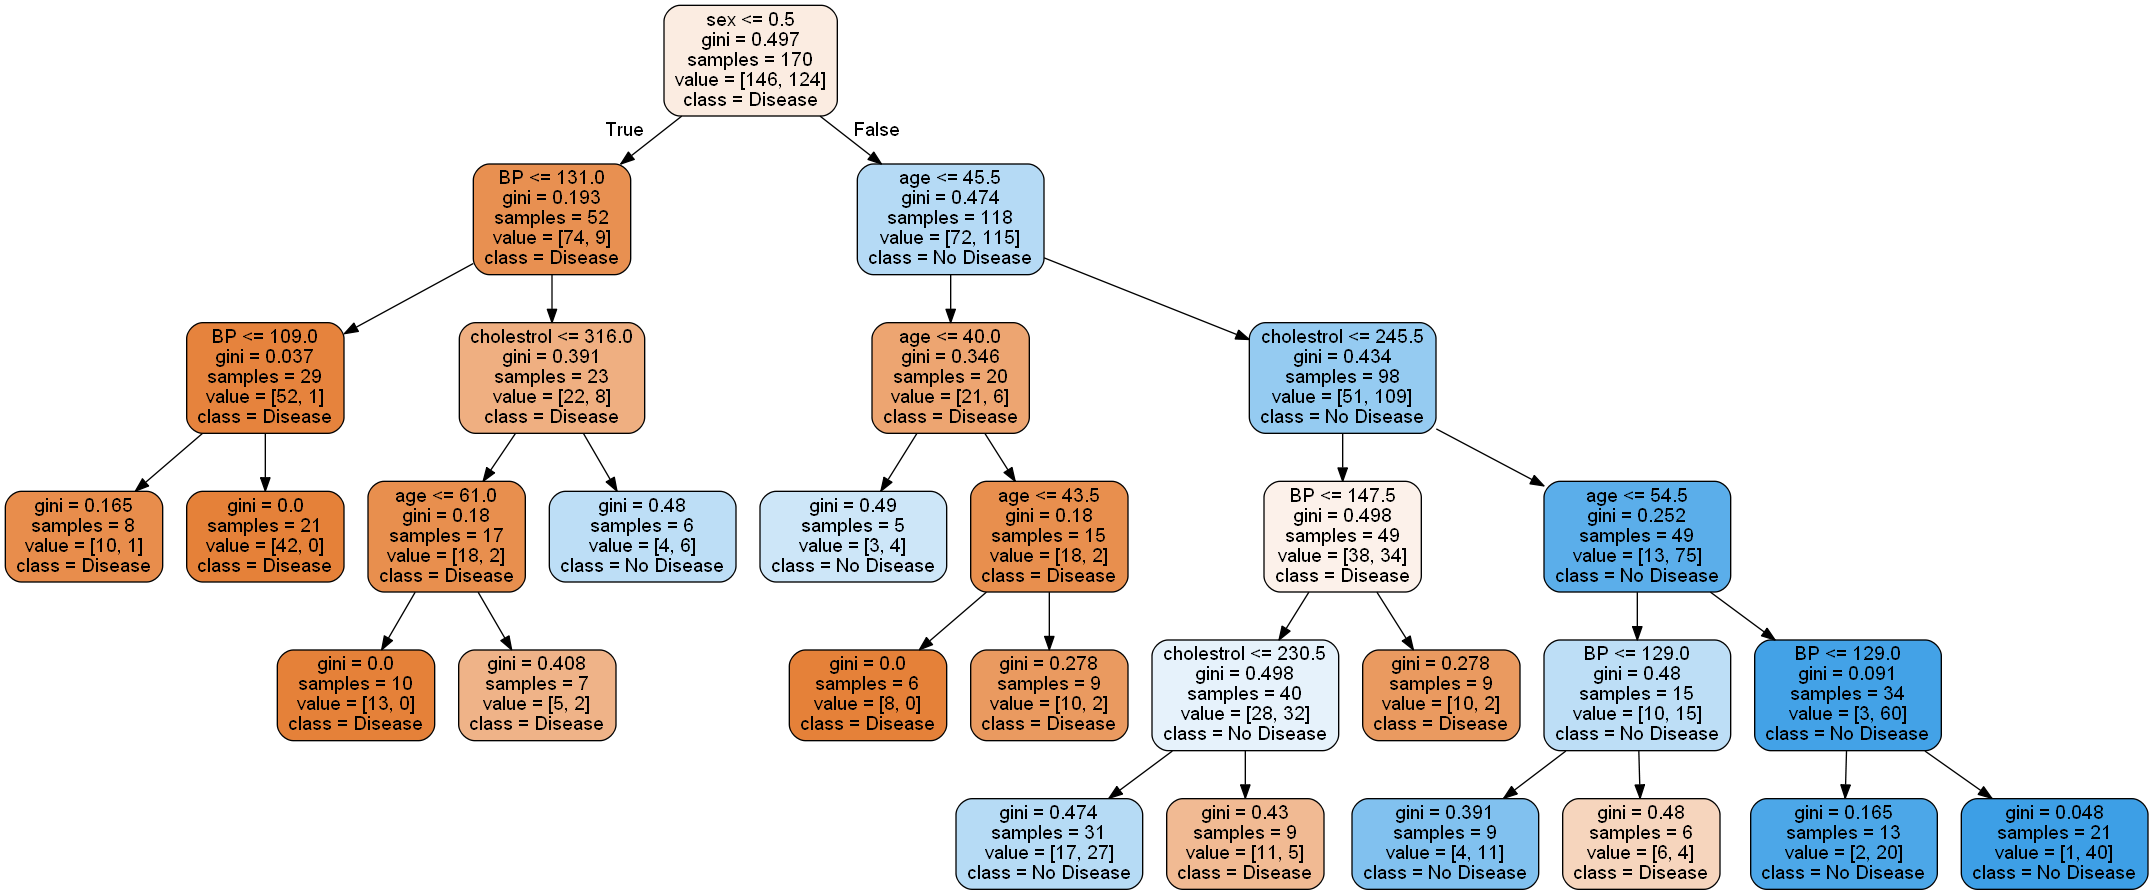

In [33]:
gph = get_dt_graph(rf_best.estimators_[0])
Image(gph.create_png(), height=600, width=600)

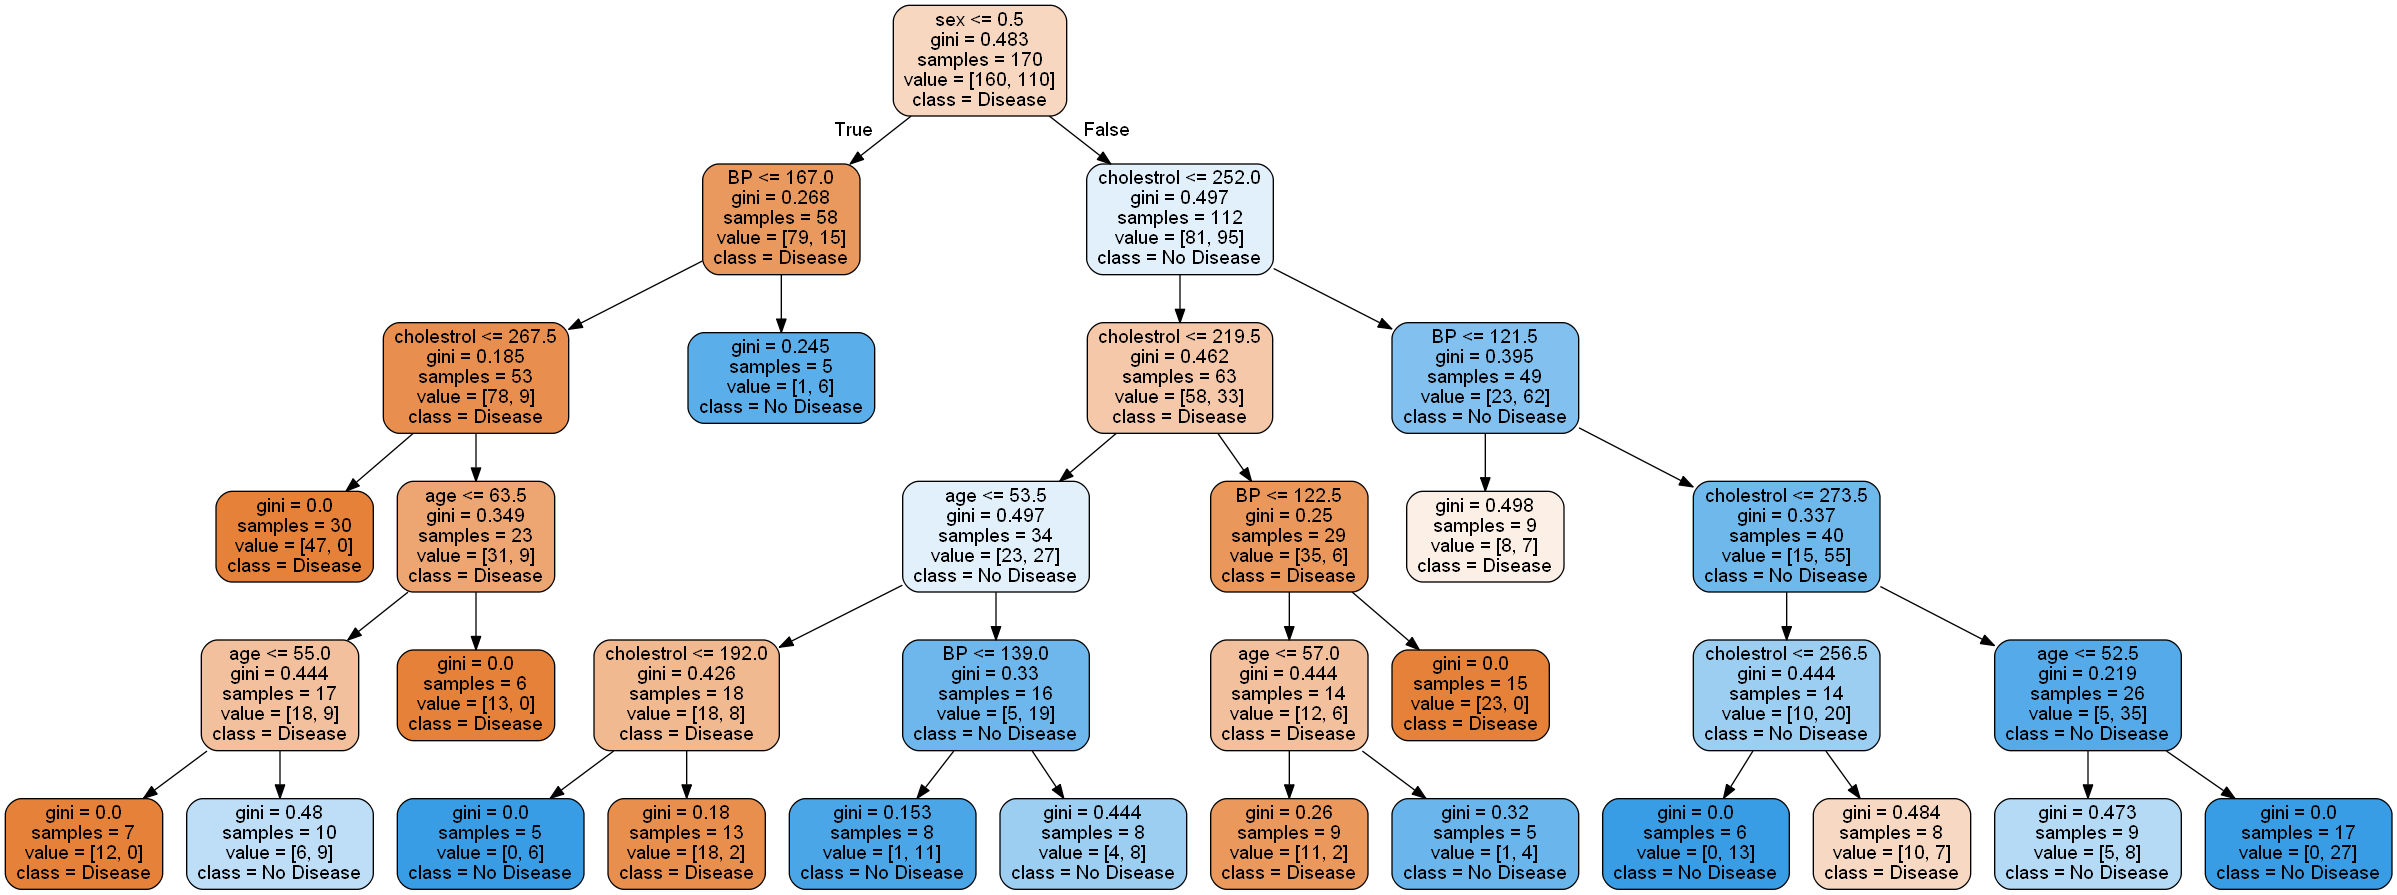

In [34]:
gph = get_dt_graph(rf_best.estimators_[10])
Image(gph.create_png(), height=600, width=600)

### Variable importance in RandomForest and Decision trees

In [22]:
classifier_rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3, bootstrap=True, criterion='gini',oob_score=True)

In [23]:
classifier_rf.fit(X_train, y_train)

C:\Users\p.neeraj.mendhekar\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\p.neeraj.mendhekar\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [24]:
classifier_rf.feature_importances_

array([0.02301768, 0.28975178, 0.0045601 , 0.015324  , 0.01024751,
       0.08175584, 0.05330772, 0.03108918, 0.27704523, 0.13017772,
       0.02278901, 0.00516279, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01377033, 0.        , 0.00320168,
       0.03879941])

In [25]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [26]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
1         duration  0.289752
8        euribor3m  0.277045
9      nr.employed  0.130178
5     emp.var.rate  0.081756
6   cons.price.idx  0.053308
20        poutcome  0.038799
7    cons.conf.idx  0.031089
0              age  0.023018
10              id  0.022789
3            pdays  0.015324
17         contact  0.013770
4         previous  0.010248
11             job  0.005163
2         campaign  0.004560
19     day_of_week  0.003202
12         marital  0.000000
13       education  0.000000
14         default  0.000000
15         housing  0.000000
16            loan  0.000000
18           month  0.000000